<a href="https://colab.research.google.com/github/ryn1221/Forcast-pendakian-per-skenario/blob/main/skripsi_split_80_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Persiapan Data & library

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade scikeras

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1


Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 61.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.3.1 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.

import itertools


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from tensorflow import keras # Import keras this way
from keras.utils import to_categorical

In [ ]:
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout

In [ ]:
pred_data = pd.read_csv('/content/drive/MyDrive/TA/dataset/REGISTER PENJUALAN KARCIS THN 2022 WANA WISATA GUNUNG PANDERMAN RPH ORO - ORO OMBO BKPH PUJON.csv')
#pred_data.set_index('Date', inplace=True)

pred_data.drop("Unnamed: 8", axis=1, inplace=True)
pred_data.drop("Unnamed: 9", axis=1, inplace=True)

In [ ]:
pred_data.head()

,Date,SERI,NO. AWAL,NO. AKHIR,JUMLAH TERJUAL,HARGA KARCIS,JUMLAH PENDAPATAN,KETERANGAN
0,2022-01-01,B,5017.0,5516.0,500.0,15000.0,7500000.0,NaN
1,2022-01-02,B,5517.0,5641.0,125.0,15000.0,1875000.0,NaN
2,2022-01-03,B,5642.0,5757.0,116.0,15000.0,1740000.0,NaN
3,2022-01-04,B,5758.0,5882.0,125.0,15000.0,1875000.0,NaN
4,2022-01-05,B,5883.0,5932.0,50.0,15000.0,750000.0,NaN


In [ ]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               730 non-null    object 
 1   SERI               560 non-null    object 
 2   NO. AWAL           560 non-null    float64
 3   NO. AKHIR          560 non-null    float64
 4   JUMLAH TERJUAL     560 non-null    float64
 5   HARGA KARCIS       560 non-null    float64
 6   JUMLAH PENDAPATAN  560 non-null    float64
 7   KETERANGAN         33 non-null     object 
dtypes: float64(5), object(3)
memory usage: 45.8+ KB


In [ ]:
pred_data.shape

(730, 8)

In [ ]:
pred_data.describe()

,NO. AWAL,NO. AKHIR,JUMLAH TERJUAL,HARGA KARCIS,JUMLAH PENDAPATAN
count,560.000000,560.000000,560.000000,560.0,5.600000e+02
mean,4592.346429,4700.237500,108.891071,15000.0,1.633366e+06
std,3184.044205,3198.082791,133.205548,0.0,1.998083e+06
min,1.000000,4.000000,2.000000,15000.0,3.000000e+04
25%,1707.000000,1768.500000,23.750000,15000.0,3.562500e+05
50%,4058.500000,4206.500000,60.000000,15000.0,9.000000e+05
75%,7335.000000,7429.500000,140.000000,15000.0,2.100000e+06
max,10600.000000,10738.000000,1154.000000,15000.0,1.731000e+07


#Prep Data

In [ ]:
pred_data.columns=pred_data.columns.str.replace(" ","").str.lower()
pred_data.columns=pred_data.columns.str.replace(".","_").str.lower()

In [ ]:
pred_data=pred_data.drop(columns=['seri', 'no_awal', 'no_akhir','hargakarcis','keterangan'])

In [ ]:
print("Shape of the dataset: ", pred_data.shape)
print("Length of the dataset: ", len(pred_data))
print("Jumlah tiket paling banyak terjual dalam satu hari : ", pred_data["jumlahterjual"].max())
print("Jumlah tiket paling sedikt terjual dalam satu hari : ", pred_data["jumlahterjual"].min())

Shape of the dataset:  (730, 3)
Length of the dataset:  730
Jumlah tiket paling banyak terjual dalam satu hari :  1154.0
Jumlah tiket paling sedikt terjual dalam satu hari :  2.0


In [ ]:
# Convert the 'date' column to datetime objects
pred_data['date'] = pd.to_datetime(pred_data['date'])

<ipython-input-19-1dee3892c34c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = pred_data["jumlahterjual"], hist = True,


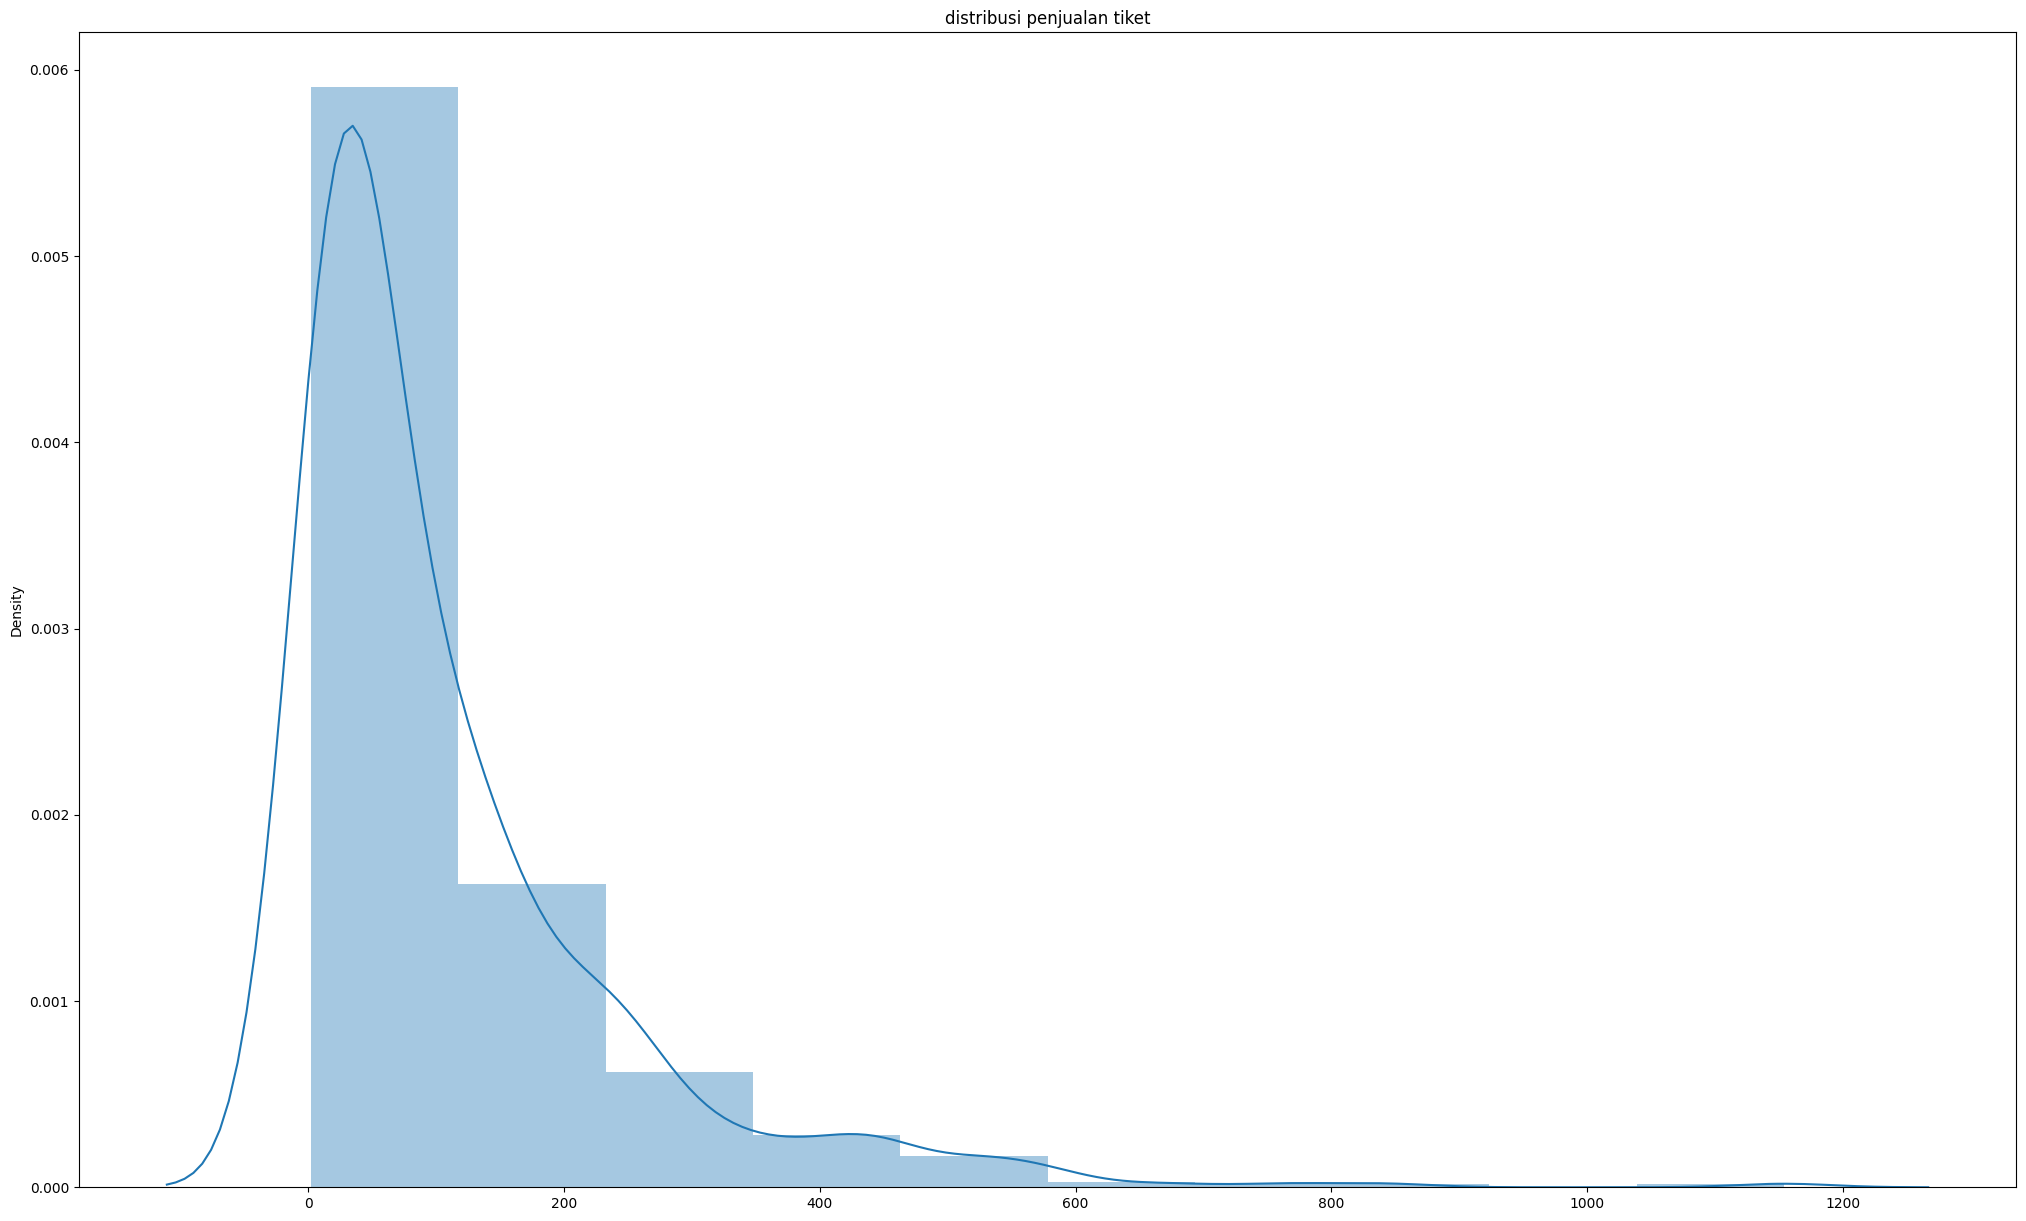

In [ ]:
fig = plt.subplots( figsize = (25, 15))

sns.distplot( x = pred_data["jumlahterjual"], hist = True,
             bins = 10, kde = True,).set(title = "distribusi penjualan tiket");

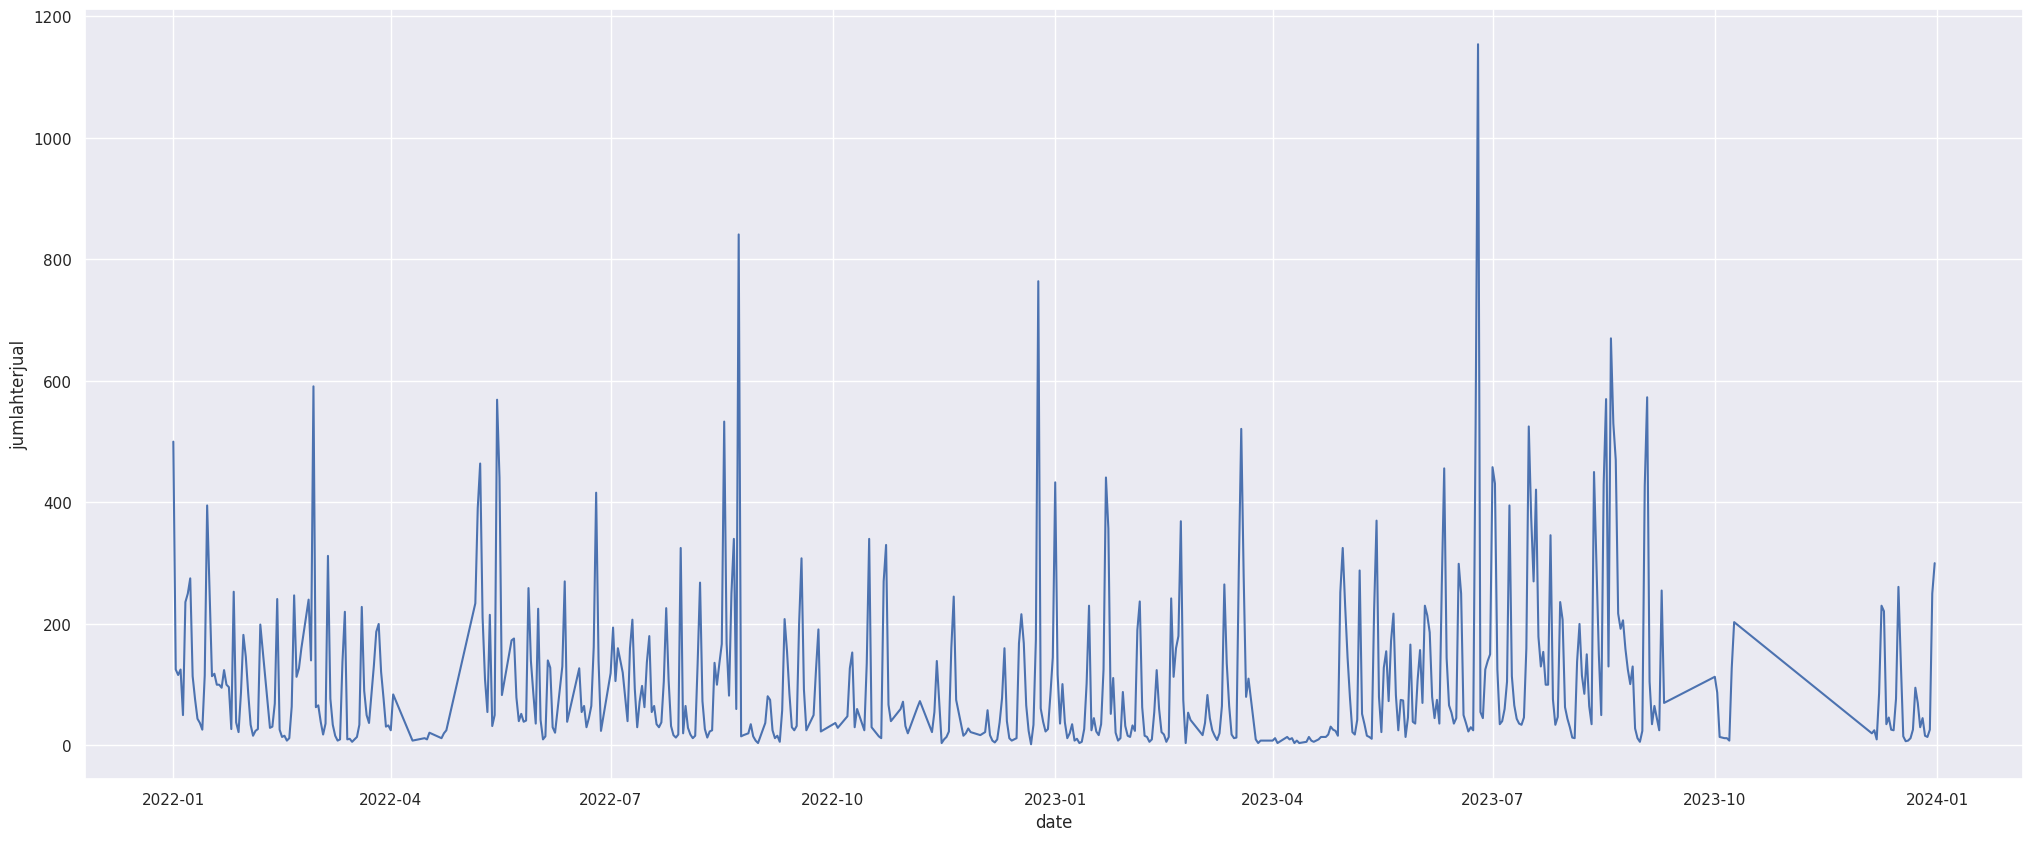

In [ ]:
sns.set(rc = {"figure.facecolor":"#ffffff"})

fig = plt.subplots( figsize = (25, 10))

sns.lineplot( x = pred_data["date"], y = pred_data["jumlahterjual"]);

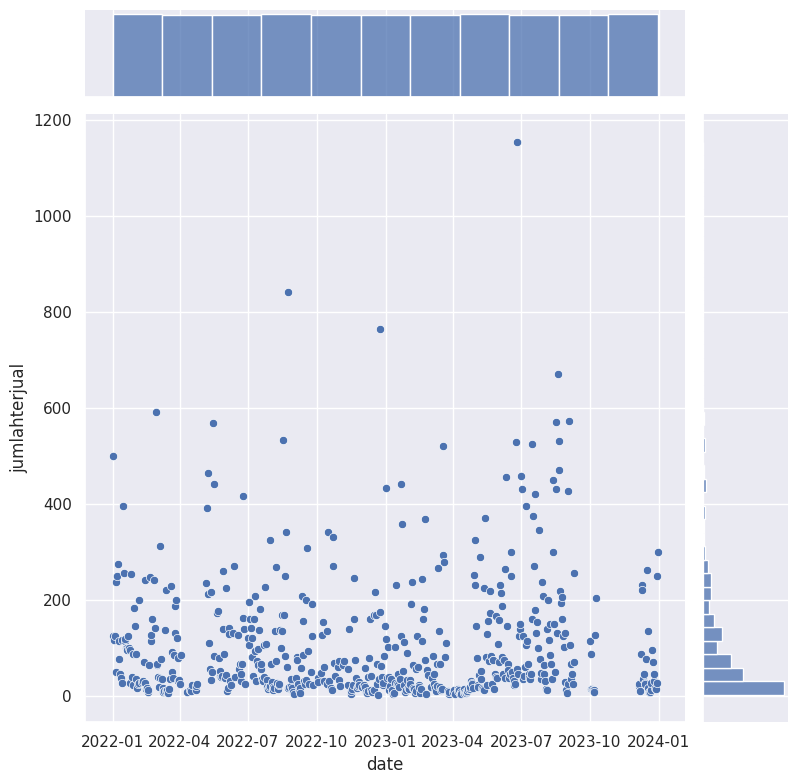

In [ ]:
sns.jointplot(x = "date", y = "jumlahterjual", data = pred_data, height = 8, ratio = 6, kind = "scatter");

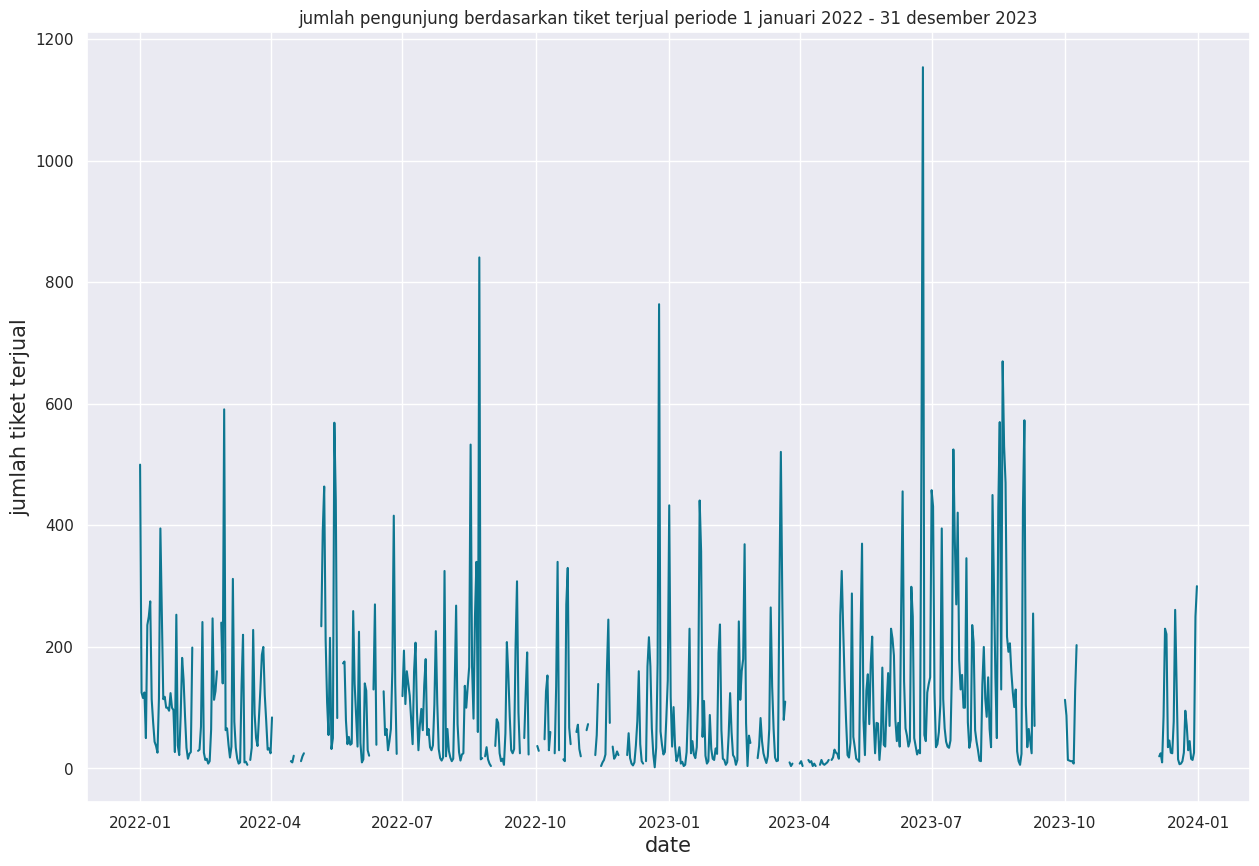

In [ ]:
fig = plt.figure(figsize = (15, 10))

plt.plot(pred_data["date"], pred_data["jumlahterjual"], color = "#0E7791")
plt.title("jumlah pengunjung berdasarkan tiket terjual periode 1 januari 2022 - 31 desember 2023")
plt.xlabel("date", fontsize = 15)
plt.ylabel("jumlah tiket terjual", fontsize = 15)
plt.show()

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,3):
    if not pred_data.iloc[:, j].notnull().all():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[1, 2]

In [ ]:
#mengisi nilai kosong dengan interpolasi liniear
for j in range(1,3):
    pred_data.iloc[:,j] = pred_data.iloc[:,j].interpolate(method='linear')

In [ ]:
pred_data.isnull().sum()

,0
date,0
jumlahterjual,0
jumlahpendapatan,0


In [ ]:
pred_data

,date,jumlahterjual,jumlahpendapatan
0,2022-01-01,500.0,7500000.0
1,2022-01-02,125.0,1875000.0
2,2022-01-03,116.0,1740000.0
3,2022-01-04,125.0,1875000.0
4,2022-01-05,50.0,750000.0
...,...,...,...
725,2023-12-27,16.0,240000.0
726,2023-12-28,14.0,210000.0
727,2023-12-29,26.0,390000.0
728,2023-12-30,250.0,3750000.0


In [ ]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              730 non-null    datetime64[ns]
 1   jumlahterjual     730 non-null    float64       
 2   jumlahpendapatan  730 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 17.2 KB


#Pemodelan

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [ ]:
# Convert the 'date' column to datetime objects and set it as the index
pred_data.set_index('date', inplace=True)

# resample the data
df_resample = pred_data.resample('W').mean()
df_resample.shape

(105, 2)

In [ ]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2022-01-01 to 2023-12-31
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   jumlahterjual     730 non-null    float64
 1   jumlahpendapatan  730 non-null    float64
dtypes: float64(2)
memory usage: 17.1 KB


##Normalisasi

In [ ]:
## * Note: I scale all features in range of [0,1].

## resample data per hour
values = df_resample.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop unused columns
print(reframed.head())

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.862118   0.862118  0.450886  0.450886
2   0.450886   0.450886  0.363124  0.363124
3   0.363124   0.363124  0.283816  0.283816
4   0.283816   0.283816  0.265298  0.265298
5   0.265298   0.265298  0.195652  0.195652


##Split Data 80:20

In [ ]:
# split train dan test sets
values = reframed.values

n_train_time = int(len(values) * 0.8)  # data train 80% of
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# reshaped the input into the 3D format as expected by LSTM [samples, timesteps, features].

(83, 1, 3) (83,) (21, 1, 3) (21,)


##Model LSTM


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best score: 0.9993359299164387
Best parameters: {'batch_size': 32, 'epochs': 500, 'model__dropout_rate': 0.2, 'model__neurons': 256}
Epoch 1/500
3/3 - 3s - 1s/step - loss: 0.0869 - val_loss: 0.1281
Epoch 2/500
3/3 - 0s - 50ms/step - loss: 0.0715 - val_loss: 0.1071
Epoch 3/500
3/3 - 0s - 41ms/step - loss: 0.0576 - val_loss: 0.0885
Epoch 4/500
3/3 - 0s - 43ms/step - loss: 0.0460 - val_loss: 0.0722
Epoch 5/500
3/3 - 0s - 46ms/step - loss: 0.0359 - val_loss: 0.0581
Epoch 6/500
3/3 - 0s - 47ms/step - loss: 0.0275 - val_loss: 0.0465
Epoch 7/500
3/3 - 0s - 50ms/step - loss: 0.0217 - val_loss: 0.0373
Epoch 8/500
3/3 - 0s - 43ms/step - loss: 0.0177 - val_loss: 0.0305
Epoch 9/500
3/3 - 0s - 38ms/step - loss: 0.0151 - val_loss: 0.0260
Epoch 10/500
3/3 - 0s - 60ms/step - loss: 0.0146 - val_loss: 0.0233
Epoch 11/500
3/3 - 0s - 37ms/step - loss: 0.0141 - val_loss: 0.0220
Epoch 12/500
3/3 - 0s - 39ms/step - loss: 0.0146 - val_loss: 0.0213
Epoch 13/500
3/3 - 0s - 37ms/step - loss: 0.0154 - val_loss: 0

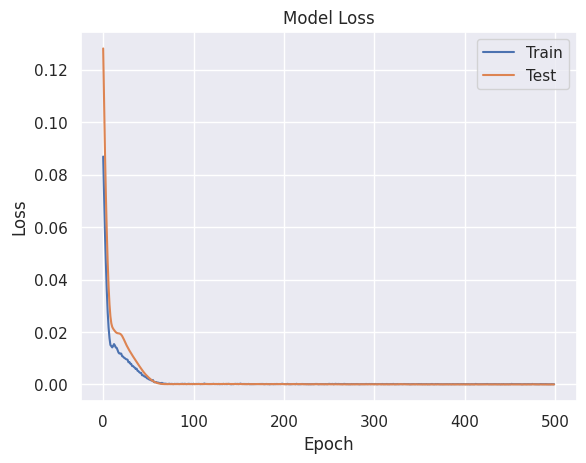

In [ ]:
# Fungsi untuk membuat model LSTM tanpa default parameter
def create_model(neurons, dropout_rate):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Membungkus model dengan KerasRegressor agar bisa digunakan dalam GridSearchCV
model = KerasRegressor(build_fn=create_model, verbose=0)

# Mendefinisikan parameter grid untuk pencarian GridSearch
param_grid = {
    'epochs': [200, 300, 500],  # Nilai epoch yang ingin diuji
    'batch_size': [32, 64, 128],  # Nilai batch size yang ingin diuji
    'model__neurons': [64, 128, 256],  # Jumlah neuron di LSTM layer, note 'model__' prefix
    'model__dropout_rate': [0.2, 0.3, 0.4]  # Dropout rate yang ingin diuji, note 'model__' prefix
}


# Menggunakan GridSearchCV untuk mencari parameter terbaik
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_X, train_y)

# Menampilkan hasil terbaik
print(f'Best score: {grid_result.best_score_}')
print(f'Best parameters: {grid_result.best_params_}')

# Dapatkan parameter terbaik
best_epochs = grid_result.best_params_['epochs']
best_batch_size = grid_result.best_params_['batch_size']
best_neurons = grid_result.best_params_['model__neurons']  # Access using 'model__neurons'
best_dropout_rate = grid_result.best_params_['model__dropout_rate']  # Access using 'model__dropout_rate'

# Membuat model dengan parameter terbaik yang ditemukan
best_model = create_model(neurons=best_neurons, dropout_rate=best_dropout_rate)

# Fit model dengan parameter terbaik
history = best_model.fit(train_X, train_y, epochs=best_epochs, batch_size=best_batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

##Hasil Prediksi

In [ ]:
# Make a prediction

# Kode untuk data pelatihan (train data)
# Make a prediction for training data
xhat = best_model.predict(train_X)

# Invert scaling for forecast (training data)
inv_xhat = np.concatenate((xhat, train_X[:, :, -1].reshape(-1, 1)), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat.reshape(-1, inv_xhat.shape[-1]))  # Flatten then inverse transform
inv_xhat = inv_xhat[:,0]

# Invert scaling for actual (training data)
train_y = train_y.reshape((len(train_y), 1))
inv_x = np.concatenate((train_y, train_X[:, :, -1].reshape(-1, 1)), axis=1)
inv_x = scaler.inverse_transform(inv_x.reshape(-1, inv_x.shape[-1]))  # Flatten then inverse transform
inv_x = inv_x[:,0]

# Kode untuk data pelatihan (test data)
# Make a prediction for test data
yhat = best_model.predict(test_X)

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, :, -1].reshape(-1, 1)), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat.reshape(-1, inv_yhat.shape[-1]))  # Flatten then inverse transform
inv_yhat = inv_yhat[:,0]

# Invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, :, -1].reshape(-1, 1)), axis=1)
inv_y = scaler.inverse_transform(inv_y.reshape(-1, inv_y.shape[-1]))  # Flatten then inverse transform
inv_y = inv_y[:,0]

# Calculate RMSE for training data
train_rmse = np.sqrt(mean_squared_error(inv_x, inv_xhat))
print('Train RMSE: %.3f' % train_rmse)

# Calculate MAPE for training data
train_mape = mean_absolute_percentage_error(inv_x, inv_xhat)
print('Train MAPE: %.3f' % train_mape)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# Calculate MAPE
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
print('Test MAPE: %.3f' % mape)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Train RMSE: 0.749
Train MAPE: 0.012
Test RMSE: 1.446
Test MAPE: 0.007


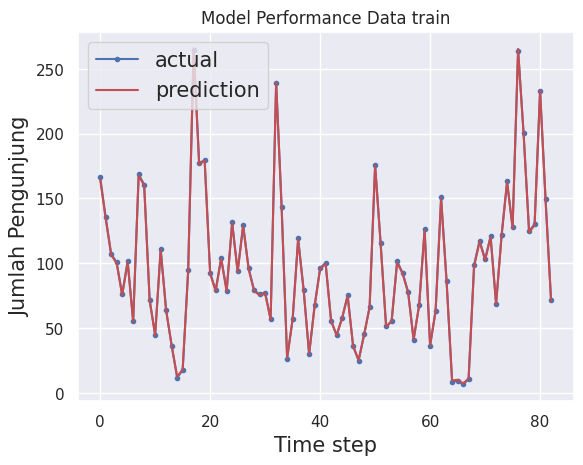

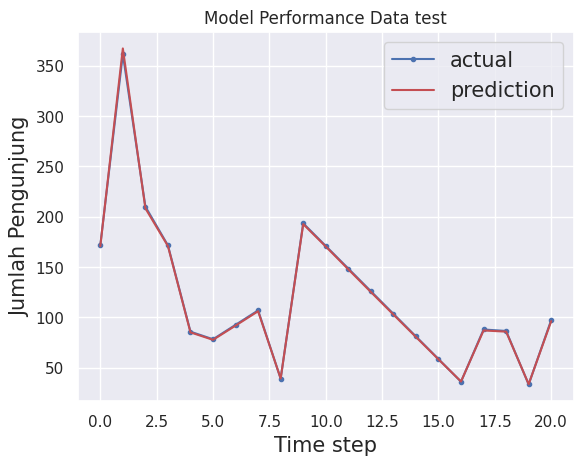

In [ ]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

# Adjust the range of aa to match the length of inv_y and inv_yhat


aa=[x for x in range(len(inv_x))] # Change this line

plt.plot(aa, inv_x, marker='.', label="actual") # Remove slicing [:200]
plt.plot(aa, inv_xhat, 'r', label="prediction") # Remove slicing [:200]
plt.title('Model Performance Data train')
plt.ylabel('Jumlah Pengunjung', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

# Adjust the range of aa to match the length of inv_y and inv_yhat
aa=[x for x in range(len(inv_y))] # Change this line

plt.plot(aa, inv_y, marker='.', label="actual") # Remove slicing [:200]
plt.plot(aa, inv_yhat, 'r', label="prediction") # Remove slicing [:200]
plt.title('Model Performance Data test')
plt.ylabel('Jumlah Pengunjung', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

